In [42]:
import matplotlib.pyplot as plt
import bintrees
import sys

We start on a 2d-field where alle cells numbered in spiral form startin at (0,0) with 0.

<code>
                 .. ..
 14  13  12  11  10 26
 15   3   2   1   9 25
 16   4   0   8  24
 17   5   6   7  23
 18  19  20  21  22
</code>


In [43]:
def cycle_length(n):
    """
    return the length of the square crossing the x-axis at position n
    """
    return 8*n

In [44]:
def cycle_start(n):
    """
    return the first index for the square crossing the x-axis at position n, this is the partial sum 
    of all squares less than n
    """
    s = 0;
    for i in range (0,n+1):
        s += cycle_length(i)
        
    return s

In [45]:
def loop_position(x,y) -> (int,int):
    """
    computes the number in c-th loop starting with (0,1,2,...)
    a loop starts always at the positon (l,0) and turns counter clockwise

    """
    l = max(abs(x), abs(y))
    p = 0
    
    if l == x:
        if y >= 0:
            p = y
        else:
            p = 8*l + y
            
    elif l == -x:
        p = 4*l - y
           
    elif l == y:
        p = 2*l - x

    elif l == -y:
        p = 6*l + x
        
    return (l,p);
        

In [46]:
def spiral_number(x,y,start_dict):
    """
    this returns the spiral index number for the postion x,y
    the start_dict is a dictionary to supress the continuously computation of the cycle_start
    """
    (loop, position) = loop_position(x,y)
    if loop not in start_dict:
        start_dict[loop] = cycle_start(loop)
        
    return start_dict[loop] - position

In [47]:
# cell to show the created spiral index for a 7x7 field 
w = 3
d = {}
f = [[spiral_number(i,j,d) for i in range(-w,w+1) ] for j in range(-w,w+1)]

for i in range(0,len(f)):
    line = ""
    for j in range(0,len(f[i])):
        line = line + "{:3d} ".format(f[i][j])
    print (line)

 33  32  31  30  29  28  27 
 34  14  13  12  11  10  26 
 35  15   3   2   1   9  25 
 36  16   4   0   8  24  48 
 37  17   5   6   7  23  47 
 38  18  19  20  21  22  46 
 39  40  41  42  43  44  45 


In [48]:
def find_next_position(x, y, possible_moves, path, cycle_starts) -> (int, int):
    """
    we start a postion (x,y) and check all possibles move (a list of tupels (x,y) containing incremental changes) 
    if we found a new position which wasn't occupied before, if we found mor than one position select the
    postion with the smallest index
    """
    next_move = (0,0)
    next_index = sys.maxsize
    for nm in possible_moves:
        nx = x + nm[0]
        ny = y + nm[1]
        nn = spiral_number(nx, ny, cycle_starts)
        if (nx,ny) not in path and next_index > nn:
            next_index = nn
            next_move= (nx, ny)
            
    return next_move

In [49]:
%%time
knight_moves = [(1,2), (2,1), (2,-1), (1,-2), (-1,-2), (-2,-1), (-2,1), (-1,2)]
neumann = [(1,0), (1,1), (0,1), (-1,1), (-1,0), (-1,-1), (0,-1), (1,-1)]

path = [(0,0)]
current_position = (0,0)
last_position = (0,0)
cycle_start_dict = {}

for i in range(0,1000):
    last_position = current_position
    current_position = find_next_position(current_position[0], current_position[1], knight_moves, path, cycle_start_dict)
    if (0,0) != current_position:
        path.append(current_position)
    else:
        print ("impossible to move at step {}".format(i))
        print ("last index is {}".format(spiral_number(last_position[0], last_position[1], cycle_start_dict)))
        break

impossible to move at step 639
last index is 435
Wall time: 37 ms


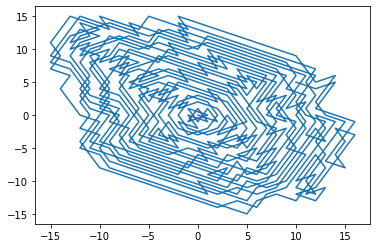

In [50]:
%matplotlib inline
x, y = zip(*path)
plt.plot(x, y)